Size of inputs (1000, 2)
Size of targets (1000, 1)
Epoch 1/100
32/32 - 0s - loss: 32.7800
Epoch 2/100
32/32 - 0s - loss: 4.4038
Epoch 3/100
32/32 - 0s - loss: 1.5148
Epoch 4/100
32/32 - 0s - loss: 0.6761
Epoch 5/100
32/32 - 0s - loss: 0.4381
Epoch 6/100
32/32 - 0s - loss: 0.3737
Epoch 7/100
32/32 - 0s - loss: 0.3714
Epoch 8/100
32/32 - 0s - loss: 0.3608
Epoch 9/100
32/32 - 0s - loss: 0.3569
Epoch 10/100
32/32 - 0s - loss: 0.3601
Epoch 11/100
32/32 - 0s - loss: 0.3608
Epoch 12/100
32/32 - 0s - loss: 0.3544
Epoch 13/100
32/32 - 0s - loss: 0.3539
Epoch 14/100
32/32 - 0s - loss: 0.3633
Epoch 15/100
32/32 - 0s - loss: 0.3567
Epoch 16/100
32/32 - 0s - loss: 0.3542
Epoch 17/100
32/32 - 0s - loss: 0.3567
Epoch 18/100
32/32 - 0s - loss: 0.3637
Epoch 19/100
32/32 - 0s - loss: 0.3548
Epoch 20/100
32/32 - 0s - loss: 0.3633
Epoch 21/100
32/32 - 0s - loss: 0.3498
Epoch 22/100
32/32 - 0s - loss: 0.3520
Epoch 23/100
32/32 - 0s - loss: 0.3492
Epoch 24/100
32/32 - 0s - loss: 0.3537
Epoch 25/100
32/32 - 

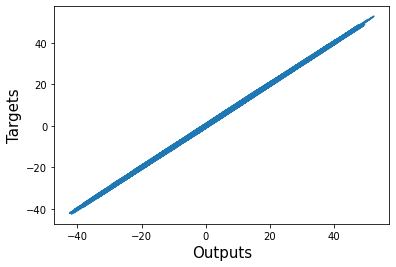

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

observations = 1000

xs = np.random.uniform(-10, 10, (observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))
print("Size of inputs", generated_inputs.shape)

noise = np.random.uniform(-1, 1, (observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise
print("Size of targets", generated_targets.shape)

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

training_data = np.load('TF_intro.npz')

input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                            kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                            bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)


plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('Outputs', fontsize = 15)
plt.ylabel('Targets', fontsize = 15)
plt.show()

In [2]:
model.layers[0].get_weights()

weights = model.layers[0].get_weights()[0]
print('Weights are:', weights)

bias = model.layers[0].get_weights()[1]
print('Bias is:', bias)

Weights are: [[ 2.0164154]
 [-2.973989 ]]
Bias is: [4.99958]


In [3]:
print("Printing the Outputs:")
model.predict_on_batch(training_data['inputs']).round(1)

Printing the Outputs:


array([[ -8.8],
       [ -2.8],
       [ 11.2],
       [  2.7],
       [  2.7],
       [ -0.4],
       [-12.6],
       [ -9.9],
       [-19.1],
       [-31. ],
       [ 21.8],
       [  2.5],
       [ -9.4],
       [ 13.2],
       [ 12.3],
       [  4.6],
       [-34.5],
       [ 22.8],
       [ -4.4],
       [ 41.2],
       [ 17.6],
       [-20.2],
       [-15. ],
       [  7.3],
       [ 13. ],
       [  8. ],
       [ 22.8],
       [-22.3],
       [ 25.5],
       [-24.7],
       [ 22.3],
       [  8.6],
       [ 31.3],
       [ 42.7],
       [-29.9],
       [ 44.6],
       [ 33.4],
       [ -6.1],
       [ 37.5],
       [ 26.6],
       [  1.3],
       [ 46.5],
       [ 45.9],
       [ 11.8],
       [-13.1],
       [-21.6],
       [ 23.9],
       [-14.5],
       [-33.4],
       [ 39.1],
       [ -2.8],
       [ 39.2],
       [-25.7],
       [  0.7],
       [ -9.6],
       [-28.9],
       [-22.8],
       [-10. ],
       [  7.2],
       [-33.8],
       [ -8.8],
       [ 25.5],
       [

In [4]:
print("Printing the Targets:")
training_data['targets'].round(1)

Printing the Targets:


array([[ -8.9],
       [ -2.7],
       [ 12.2],
       [  2.6],
       [  3. ],
       [ -0.8],
       [-13.7],
       [-10.2],
       [-19.4],
       [-31.2],
       [ 20.9],
       [  2.7],
       [-10. ],
       [ 14.3],
       [ 13.2],
       [  4.7],
       [-34. ],
       [ 22.5],
       [ -4.1],
       [ 41.3],
       [ 17.9],
       [-21.1],
       [-15.6],
       [  6.7],
       [ 12. ],
       [  8.1],
       [ 23.4],
       [-22.5],
       [ 26.4],
       [-25. ],
       [ 22.8],
       [  8.7],
       [ 31.1],
       [ 42.9],
       [-29.6],
       [ 44. ],
       [ 33. ],
       [ -7.2],
       [ 38.2],
       [ 25.9],
       [  0.4],
       [ 46.3],
       [ 46.7],
       [ 11.1],
       [-13.1],
       [-22.5],
       [ 24.3],
       [-15.1],
       [-34.2],
       [ 39.7],
       [ -3.2],
       [ 38.9],
       [-25. ],
       [  0.7],
       [-11. ],
       [-28.1],
       [-22.7],
       [ -9.5],
       [  6.6],
       [-33.8],
       [ -9.2],
       [ 25.4],
       [